In [30]:

import pandas as pd
import numpy as np
import re
import math
import os
import subprocess

# Text and feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Evaluation and tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc)

# Classifier
from sklearn.naive_bayes import GaussianNB

# Text cleaning & stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import torch
import torch.nn

[nltk_data] Downloading package stopwords to /Users/dwika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import simple_mlp
import TextDataset
import importlib
importlib.reload(simple_mlp)

<module 'simple_mlp' from '/Volumes/Dwika/ISE/ISE-solution/lab1/simple_mlp.py'>

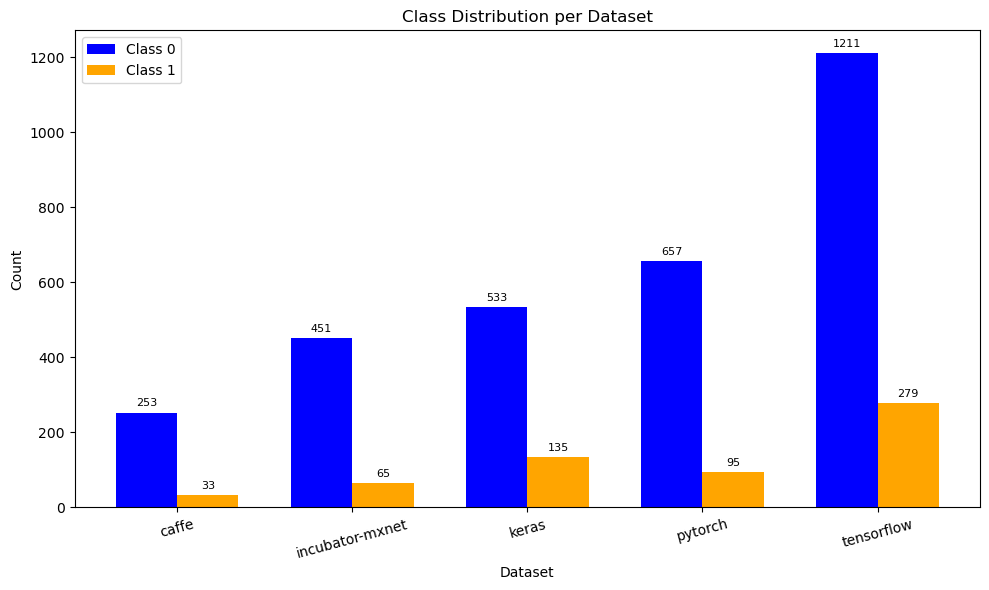

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder and filenames
folder_path = "datasets/"
filenames = ["caffe.csv", "incubator-mxnet.csv", "keras.csv", "pytorch.csv", "tensorflow.csv"]

# Dictionary to store class distributions
class_distributions = {}

# Read each file and compute the distribution of the 'class' column
for filename in filenames:
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)
    class_counts = df['class'].value_counts().sort_index()
    class_distributions[filename] = class_counts

# Prepare data for combined bar plot
dataset_names = []
class_0_counts = []
class_1_counts = []

for filename in filenames:
    counts = class_distributions.get(filename, pd.Series([0, 0]))
    dataset_names.append(filename.replace(".csv", ""))
    class_0_counts.append(counts.get(0, 0))
    class_1_counts.append(counts.get(1, 0))

x = range(len(dataset_names))
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars0 = ax.bar([i - width/2 for i in x], class_0_counts, width, label='Class 0', color='blue')
bars1 = ax.bar([i + width/2 for i in x], class_1_counts, width, label='Class 1', color='orange')

# Add counts on top of bars
for bar in bars0 + bars1:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# Labeling
ax.set_xlabel("Dataset")
ax.set_ylabel("Count")
ax.set_title("Class Distribution per Dataset")
ax.set_xticks(x)
ax.set_xticklabels(dataset_names, rotation=15)
ax.legend()

plt.tight_layout()
plt.show()

# Seems data is imbalanced for all 

In [33]:
from math import gcd

In [34]:
# Show the ratio of each class to figure out which is better for ratio of 0 and 1

for i in range(len(class_0_counts)):
    print(f"Dataset: {filenames[i]}, Ratio:{class_1_counts[i]/class_0_counts[i]}")

Dataset: caffe.csv, Ratio:0.13043478260869565
Dataset: incubator-mxnet.csv, Ratio:0.14412416851441243
Dataset: keras.csv, Ratio:0.25328330206378985
Dataset: pytorch.csv, Ratio:0.1445966514459665
Dataset: tensorflow.csv, Ratio:0.23038810900082576


### We choose tensorflow for training despite having a lower ratio then pytorch it still has the largest dataset , and not a huge difference between keras and tensorflow 

In [35]:
from torch.utils.data import random_split, DataLoader

# Step 1: Create the full dataset
full_dataset = TextDataset.TextDatasetTFIDF('datasets/tensorflow.csv')

# Step 2: Define train/val split sizes
val_ratio = 0.2
val_size = int(len(full_dataset) * val_ratio)
train_size = len(full_dataset) - val_size

# Step 3: Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Step 4: Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

Preprocessed DataFrame:
                                                   text  sentiment
941  Graph_def is invalid at node u'ExpandDims': In...          0
297  stream_executor/platform/mutex.h doesn't compi...          0
271  [Perfomance]Dilated/Atrous Conv implementation...          1
774  Tensorflow 2.0 keras load_model does not resto...          0
420  Multiprocessing for input pipeline . I have as...          0


In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
import helper

In [37]:
model = simple_mlp.MLPWithLayerNorm(input_dim=1000).to('cpu') 
criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(model.parameters(), lr=1e-2) 
model


MLPWithLayerNorm(
  (fc1): Linear(in_features=1000, out_features=64, bias=True)
  (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [38]:
epochs=100* len(train_loader)
# ========== Training Loop ==========
for epoch in range(epochs):
    model.train()
    total_train_loss = 0

    for batch_X, batch_y in train_loader:
        batch_X=batch_X.to('cpu')
        batch_y=batch_y.to('cpu')
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
    print(f"Epoch {epoch} until {epochs}")
 
    

Epoch 0 until 3800
Epoch 1 until 3800
Epoch 2 until 3800
Epoch 3 until 3800
Epoch 4 until 3800
Epoch 5 until 3800
Epoch 6 until 3800
Epoch 7 until 3800
Epoch 8 until 3800
Epoch 9 until 3800
Epoch 10 until 3800
Epoch 11 until 3800
Epoch 12 until 3800
Epoch 13 until 3800
Epoch 14 until 3800
Epoch 15 until 3800
Epoch 16 until 3800
Epoch 17 until 3800
Epoch 18 until 3800
Epoch 19 until 3800
Epoch 20 until 3800
Epoch 21 until 3800
Epoch 22 until 3800
Epoch 23 until 3800
Epoch 24 until 3800
Epoch 25 until 3800
Epoch 26 until 3800
Epoch 27 until 3800
Epoch 28 until 3800
Epoch 29 until 3800
Epoch 30 until 3800
Epoch 31 until 3800
Epoch 32 until 3800
Epoch 33 until 3800
Epoch 34 until 3800
Epoch 35 until 3800
Epoch 36 until 3800
Epoch 37 until 3800
Epoch 38 until 3800
Epoch 39 until 3800
Epoch 40 until 3800
Epoch 41 until 3800
Epoch 42 until 3800
Epoch 43 until 3800
Epoch 44 until 3800
Epoch 45 until 3800
Epoch 46 until 3800
Epoch 47 until 3800
Epoch 48 until 3800
Epoch 49 until 3800
Epoch 50 u

In [39]:
import helper
helper.evaluate_model(model,val_loader,"pytorch","pytorch",0)

{'iteration': 0,
 'name': 'pytorch->pytorch',
 'accuracy': 0.8959731543624161,
 'precision': 0.7872340425531915,
 'recall': 0.6379310344827587,
 'f1': 0.7047619047619048,
 'auc': 0.8880747126436781}

In [47]:
torch.save(model, 'models/base_data_tensorflow.pt')

# Prediction on Different Data Set


In [60]:
model_base = torch.load('models/base_data_tensorflow.pt')

/var/folders/zp/f7z3n2sd0ygb8_hfzm0lbzb40000gn/T/ipykernel_14313/1857705174.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_base = torch.load('models/base_data_ten

In [61]:
inference_dataset=TextDataset.TextDatasetTFIDF("datasets/caffe.csv")
inference_loader = DataLoader(inference_dataset, batch_size=32, shuffle=False)

Preprocessed DataFrame:
                                                   text  sentiment
9    unable to reproduce accuracy of bvlc-alexnet. ...          1
267  osx: abs not defined absval_layer. When compil...          0
143  cafe_intsall.caffe 36 error. I am trying caffe...          0
212   undefined reference to `lzma_index_end@XZ_5.0...          0
227  Dimension mismatch training with my own model ...          0


In [62]:
len(inference_loader)

9

In [63]:
helper.evaluate_model(model_base,inference_loader,"pytorch","keras",0)

{'iteration': 0,
 'name': 'pytorch->keras',
 'accuracy': 0.8006993006993007,
 'precision': 0.125,
 'recall': 0.12121212121212122,
 'f1': 0.12307692307692308,
 'auc': 0.5509641873278237}

# Trying Tent on Title Body Caffe

In [64]:
import tent
import TextDataset
import importlib
# import batch_data_loader
importlib.reload(TextDataset)  
importlib.reload(tent)

<module 'tent' from '/Volumes/Dwika/ISE/ISE-solution/lab1/tent.py'>

In [65]:
result=tent.TentLayerNorm(model_base,inference_loader,"pytorch","keras",1)
result

Here


Adapting with Tent: 100%|██████████| 9/9 [00:00<00:00, 326.04it/s]


{'iteration': 1,
 'name': 'pytorch->keras',
 'accuracy': 0.8041958041958042,
 'precision': 0.12903225806451613,
 'recall': 0.12121212121212122,
 'f1': 0.125,
 'auc': 0.5544376572044556}